In [1]:
from urllib.request import urlopen
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import numpy as np
from urllib import parse

In [2]:
# 일자별 차트 크롤링
# 1등 가져오기
# 전체 순위 가져오기

In [3]:
url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate='
url = url + str(20221204)

html = requests.get(url)
soup = bs(html.text, 'html.parser')

In [4]:
bugs_today = soup.select('#CHARTday > table > tbody > tr')


In [7]:
bugs_day = []

for item in bugs_today:
    song = item.find_all('th')[0].find_all('a')[0].text
    ranking = item.find_all('td')[1].find('div').find('strong').text
    artist = item.find_all('td')[4].find('a').text
    album = item.find_all('td')[5].find('a').text
    bugs_day.append([ranking,song,artist,album])

df = pd.DataFrame(bugs_day, columns=["순위", "곡명", "아티스트", '앨범'])
df


,순위,곡명,아티스트,앨범
0,1,사건의 지평선,윤하(Younha/ユンナ),YOUNHA 6th Album Repackage 'END THEORY : Final...
1,2,WHEN I MOVE,카라(Kara),MOVE AGAIN
2,3,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans'
3,4,ANTIFRAGILE,LE SSERAFIM (르세라핌),ANTIFRAGILE
4,5,Dreamers [Music from the FIFA World Cup Qatar ...,정국,Dreamers [Music from the FIFA World Cup Qatar ...
...,...,...,...,...
95,96,모든 계절은 너였다,길구봉구,모든 계절은 너였다
96,97,가을밤에 든 생각,잔나비,잔나비 소곡집 l
97,98,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9
98,99,MY BAG,(여자)아이들,I NEVER DIE


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    object
 1   곡명      100 non-null    object
 2   아티스트    100 non-null    object
 3   앨범      100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [155]:
# 순위에 따라서 점수 부여
# 1등 -> 100점, 100등 -> 1점

In [156]:
score = []
for i in range(100):
    score.append(101 - int(df.loc[i, '순위']))
df['점수'] = score
df
    

,순위,곡명,아티스트,앨범,점수
0,1,사건의 지평선,윤하(Younha/ユンナ),YOUNHA 6th Album Repackage 'END THEORY : Final...,100
1,2,WHEN I MOVE,카라(Kara),MOVE AGAIN,99
2,3,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans',98
3,4,ANTIFRAGILE,LE SSERAFIM (르세라핌),ANTIFRAGILE,97
4,5,Dreamers [Music from the FIFA World Cup Qatar ...,정국,Dreamers [Music from the FIFA World Cup Qatar ...,96
...,...,...,...,...,...
95,96,모든 계절은 너였다,길구봉구,모든 계절은 너였다,5
96,97,가을밤에 든 생각,잔나비,잔나비 소곡집 l,4
97,98,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,3
98,99,MY BAG,(여자)아이들,I NEVER DIE,2


In [4]:
from tqdm import tqdm

In [22]:
start_date = input('시작일 입력: ')
end_date = input('종료일 입력: ')

dates = pd.date_range(start_date,end_date)

df_bugs = pd.DataFrame()   ####이거는 왜 설정해줬고 왜 없으면 날짜별로 쫙 안나오지?????

for date in tqdm(dates):
    url = 'https://music.bugs.co.kr/chart/track/day/total?chartdate=' + str(date)

    html = requests.get(url)
    soup = bs(html.text, 'html.parser')

    bugs_day = []

    bugs_today = soup.select('#CHARTday > table > tbody > tr')
    score = 101
    for item in bugs_today:
        song = item.find_all('th')[0].find_all('a')[0].text
        ranking = item.find_all('td')[1].find('div').find('strong').text
        artist = item.find_all('td')[4].find('a').text
        album = item.find_all('td')[5].find('a').text
        score -= 1
        bugs_day.append([date, ranking,song,artist,album, score])

    df = pd.DataFrame(bugs_day, columns= ['날짜',"순위", "곡명", "아티스트", '앨범', '점수'])

    df_bugs = pd.concat([df_bugs, df])


df_bugs

100%|██████████| 8/8 [00:03<00:00,  2.46it/s]


,날짜,순위,곡명,아티스트,앨범,점수
0,2022-12-08,1,WHEN I MOVE,카라(Kara),MOVE AGAIN,100
1,2022-12-08,2,사건의 지평선,윤하(Younha/ユンナ),YOUNHA 6th Album Repackage 'END THEORY : Final...,99
2,2022-12-08,3,Hype Boy,NewJeans,NewJeans 1st EP 'New Jeans',98
3,2022-12-08,4,ANTIFRAGILE,LE SSERAFIM (르세라핌),ANTIFRAGILE,97
4,2022-12-08,5,After LIKE,IVE (아이브),After LIKE,96
...,...,...,...,...,...,...
95,2022-12-08,96,첫사랑,백아(Baek A),첫사랑,5
96,2022-12-08,97,가을밤에 든 생각,잔나비,잔나비 소곡집 l,4
97,2022-12-08,98,MY BAG,(여자)아이들,I NEVER DIE,3
98,2022-12-08,99,That That (prod. & feat. SUGA of BTS),싸이 (PSY),싸다9,2


In [23]:
df_bugs_top = df_bugs.groupby('아티스트').sum().sort_values('점수', ascending=False).head(10)

df_bugs_top

/var/folders/rx/pyxnz2c109qgv29mx2rvvtv40000gn/T/ipykernel_4445/1746997626.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_bugs_top = df_bugs.groupby('아티스트').sum().sort_values('점수', ascending=False).head(10)


,점수
아티스트,
NewJeans,2147
IVE (아이브),2107
Red Velvet (레드벨벳),2011
카라(Kara),1971
Charlie Puth(찰리 푸스),1885
LE SSERAFIM (르세라핌),1829
윤하(Younha/ユンナ),1496
BLACKPINK,1381
(여자)아이들,1374


findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
/Users/leesangyup/opt/anaconda3/envs/webcrawling/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/leesangyup/opt/anaconda3/envs/webcrawling/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
/Users/leesangyup/opt/anaconda3/envs/webcrawling/l

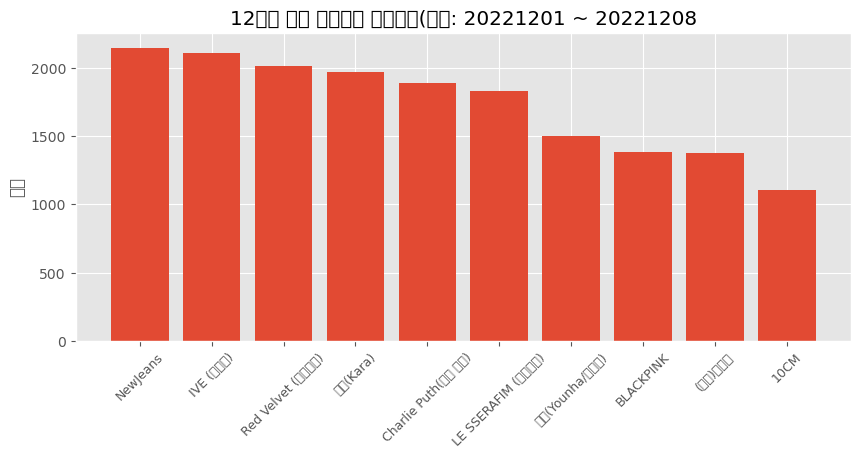

In [33]:
import matplotlib.pyplot as plt
import platform

plt.rc('font', family = "NanumMyeongjo")

plt.style.use('ggplot')
plt.figure(figsize=(10,4))
plt.xticks(size = 9, rotation = 45)

plt.bar(df_bugs_top.index, df_bugs_top['점수'])

plt.title(f"12월에 가장 인기있던 아티스트(기간: {start_date} ~ {end_date}")
plt.ylabel('점수')

plt.show()

In [ ]:
# 특정 기간 내 차트 진입 점수 계산
# 예) 15일간 차트 분석
# 12월12일 -> 아이유 150점, 12월 11일-> 아이유 160점 ---> 12월 1일 아이유 누적점수 ~~점
# 누적된 점수별 아티스트 계산 상위 1명 히스토르램으로 그려보세요.


In [ ]:
# 과제
# naver 무비 리뷰
# https://movie.naver.com/movie/point/af/list.naver
# 100페이지 -> 하나의 dataframe -> csv파일로 저장
# 크롤링
# 번호, 감상평, 점수1(원래 점수) 점수2(7점이상 1, 7점 이하 0)

# 방법1: bs 이용
# 방법2: pandas.read_html()에서 table 정보만 추출

# 100패이지 -> 시간단축 ---> python의 멀티프로세싱 모듈



